# Import Libraries 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, roc_auc_score

# Load Dataset

In [2]:
df=sns.load_dataset("titanic")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Data Cleaning and Preprocessing

In [3]:
df.drop(['sibsp', 'parch', 'fare','embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town','alive', 'alone'],axis=1,inplace=True) 
df.rename(columns={"survived":"Survived","pclass":"Class","sex":"Gender","age":"Age"},inplace=True) 
df['Age']=df['Age'].fillna(np.mean(df['Age']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Class     891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


# Feature Selection and Label Encoding

In [6]:
X=df[['Class','Gender','Age']]
y=df['Survived'] 
le=LabelEncoder()
X.loc[:,'Gender']=le.fit_transform(X['Gender']) 
X=X.astype("int64")

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   891 non-null    int64
 1   Gender  891 non-null    int64
 2   Age     891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


# Split Data and Train Logistic Regression Model

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
prediction

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [18]:
prob=model.predict_proba(X_test)
prob

array([[0.89860484, 0.10139516],
       [0.77235082, 0.22764918],
       [0.87219561, 0.12780439],
       [0.13048917, 0.86951083],
       [0.3438652 , 0.6561348 ],
       [0.08832866, 0.91167134],
       [0.4475418 , 0.5524582 ],
       [0.85868093, 0.14131907],
       [0.3570827 , 0.6429173 ],
       [0.07327398, 0.92672602],
       [0.59329024, 0.40670976],
       [0.93196841, 0.06803159],
       [0.4475418 , 0.5524582 ],
       [0.90121979, 0.09878021],
       [0.79686309, 0.20313691],
       [0.06757478, 0.93242522],
       [0.6277914 , 0.3722086 ],
       [0.4475418 , 0.5524582 ],
       [0.75128875, 0.24871125],
       [0.66103794, 0.33896206],
       [0.88459155, 0.11540845],
       [0.57211417, 0.42788583],
       [0.37731815, 0.62268185],
       [0.87219561, 0.12780439],
       [0.89860484, 0.10139516],
       [0.83619343, 0.16380657],
       [0.61412515, 0.38587485],
       [0.77235082, 0.22764918],
       [0.81091555, 0.18908445],
       [0.46193877, 0.53806123],
       [0.

# Evaluate Model Performance

In [14]:
print(f"Accuracy Score for this model: {accuracy_score(y_test,prediction)}") 
print("-"*100)
print(f"      Classification Report for the same is given below: \n \n  {classification_report(y_test,prediction)}")


Accuracy Score for this model: 0.8097014925373134
----------------------------------------------------------------------------------------------------
      Classification Report for the same is given below: 
 
                precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



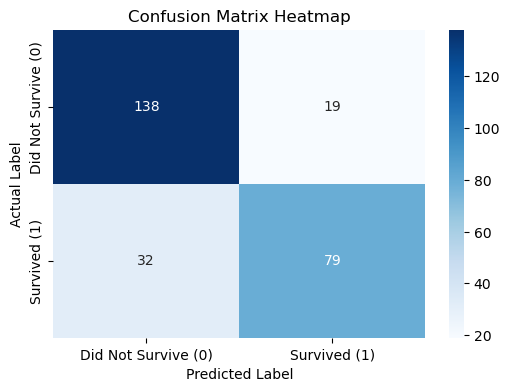

In [15]:
cm = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive (0)', 'Survived (1)'], yticklabels=['Did Not Survive (0)', 'Survived (1)'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

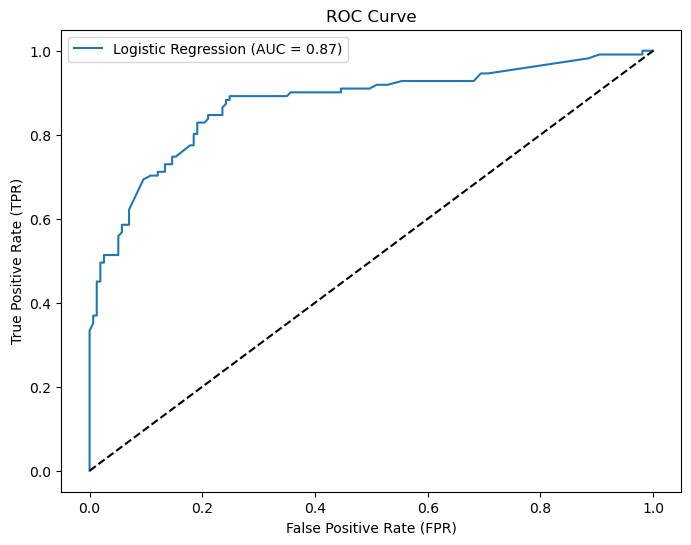

In [17]:
# Get the probability of the positive class (1 - Survived)
y_prob = prob[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line for random chance
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()